# Import The Libraries #

In [1]:
# Import Important Libarary
import tqdm
import os
import cv2
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
import warnings
from PIL import Image
warnings.filterwarnings("ignore")


# Read the Dataset

In [2]:
image_path = "/kaggle/input/10-classes/10-classes"
image_files = [f for f in os.listdir(image_path) if f.endswith('.png')]  # Or the file extension you need   

x = []
y = []

for img_file in image_files:
    # Load the image
    img = Image.open(os.path.join(image_path, img_file))
    img = img.resize((64, 64))  # Resize if necessary
    img_array = np.array(img).flatten()  # Flatten the image into a 1D array

    # Extract label from filename (assuming it follows a naming pattern)
    label = int(img_file.split('__')[0][-1])  # Example: Extracting label from 'obj1__0', 'obj1__5', etc.
    
    x.append(img_array)
    y.append(label)
x = np.array(x)
y = np.array(y)

x.shape


(720, 12288)

# Feature Refuction using PCA

In [3]:
from sklearn.decomposition import PCA

# Specify the number of components or use the default
pca = PCA(n_components=5)  # Or choose based on explained variance
x_pca = pca.fit_transform(x)

x_pca.shape

(720, 5)

# Spliting the Data to Train and Test

In [4]:
from sklearn.model_selection import train_test_split

# Perform the split with stratification (if needed)
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.3, random_state=0, stratify=y)


# Visualize number of digits classes

{0: 50, 1: 50, 2: 51, 3: 50, 4: 51, 5: 50, 6: 50, 7: 50, 8: 51, 9: 51}


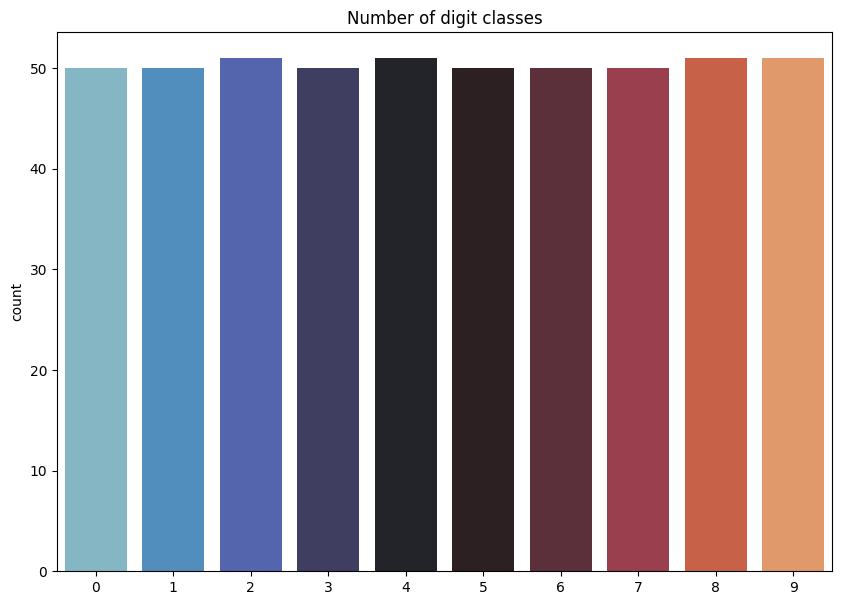

In [5]:
# visualize number of digits classes
plt.figure(figsize=(10,7))
sns.countplot(x=y_train, palette="icefire")
plt.title("Number of digit classes")
# Instead of y_train.value_counts(), use np.unique with bincount to get counts
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts))) # Print the unique values and their counts

# Display one Image

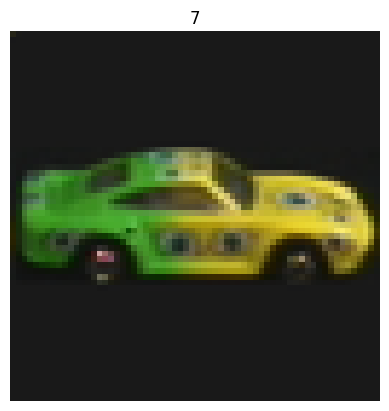

In [6]:
img = x[5]
img = img.reshape((64, 64, 3))
plt.imshow(img,cmap='gray')
plt.title(y[0])
plt.axis("off")
plt.show()

# Train the Logistic Regression

In [7]:
# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000)# Create Object Of Model
log_reg.fit(x_train, y_train) # Train Model
y_pred_logistic = log_reg.predict(x_test) #Predict the Test Data
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)# Calculate Accuracy
# Print Results
print(f"Logistic Regression Accuracy: {accuracy_logistic:.2f}")

Logistic Regression Accuracy: 0.99


# Train The KNN

In [8]:
# Train k-NN
knn = KNeighborsClassifier(n_neighbors=5) #take Object Of Model
knn.fit(x_train, y_train) # Train Model
y_pred_knn = knn.predict(x_test)# Predict the Test data
accuracy_knn = accuracy_score(y_test, y_pred_knn)# Claculate The Accuracy
# Print Results
print(f"k-NN Accuracy: {accuracy_knn:.2f}")

k-NN Accuracy: 0.97


# Accurcy for The models

In [9]:
# Accuracy For Models
print(f"Logistic Regression Accuracy: {accuracy_logistic:.2f}")
print(f"KNN Accuracy: {accuracy_knn:.2f}")

Logistic Regression Accuracy: 0.99
KNN Accuracy: 0.97


# Confusion matrix for Logistic regression and KNN

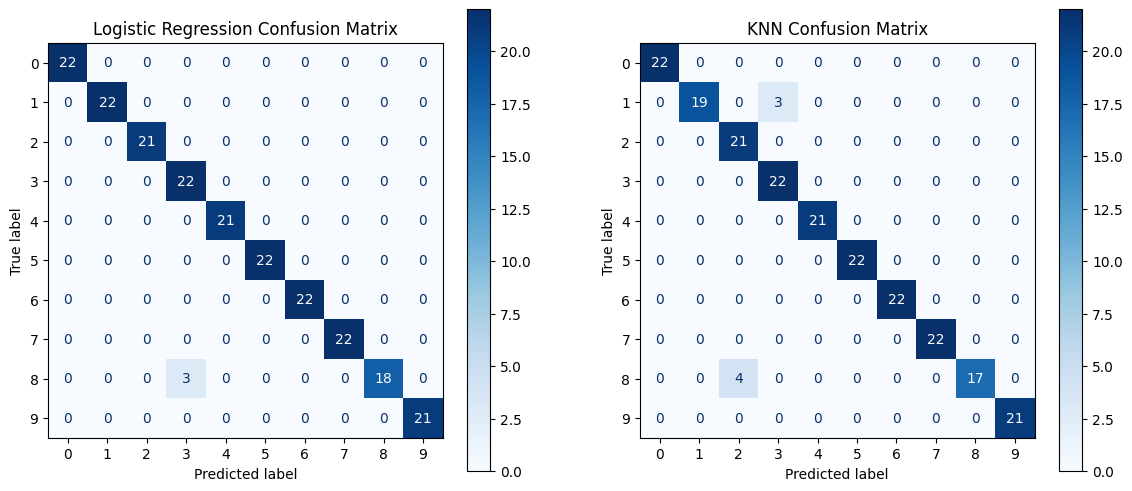

In [10]:
# Confusion Matrix for Logistic Regression
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Plot confusion matrix
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
ConfusionMatrixDisplay(confusion_matrix=cm_logistic).plot(ax=axes[0], cmap="Blues")
axes[0].set_title("Logistic Regression Confusion Matrix")
ConfusionMatrixDisplay(confusion_matrix=cm_knn).plot(ax=axes[1], cmap="Blues")
axes[1].set_title("KNN Confusion Matrix")
plt.show()


# Precision and Recall for KNN and Logistic Regression

In [11]:
# Precision and Recall
precision_logistic = precision_score(y_test, y_pred_logistic, average='weighted')
recall_logistic = recall_score(y_test, y_pred_logistic, average='weighted')

precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')

print(f"Logistic Regression Precision: {precision_logistic:.2f}")
print(f"KNN Precision: {precision_knn:.2f}")
print(f"Logistic Regression Recall: {recall_logistic:.2f}")
print(f"KNN Recall: {recall_knn:.2f}")

Logistic Regression Precision: 0.99
KNN Precision: 0.97
Logistic Regression Recall: 0.99
KNN Recall: 0.97


# Accuracy Comparison Plot

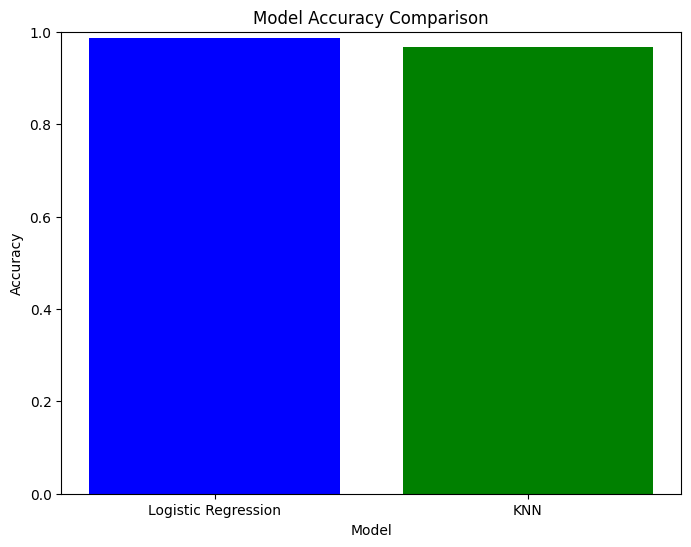

In [12]:
# Accuracy comparison plot
models = ['Logistic Regression', 'KNN']
accuracies = [accuracy_logistic, accuracy_knn]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim([0, 1])
plt.show()

# ROC Curve and AUC for Logistic Regression (Multi-class)

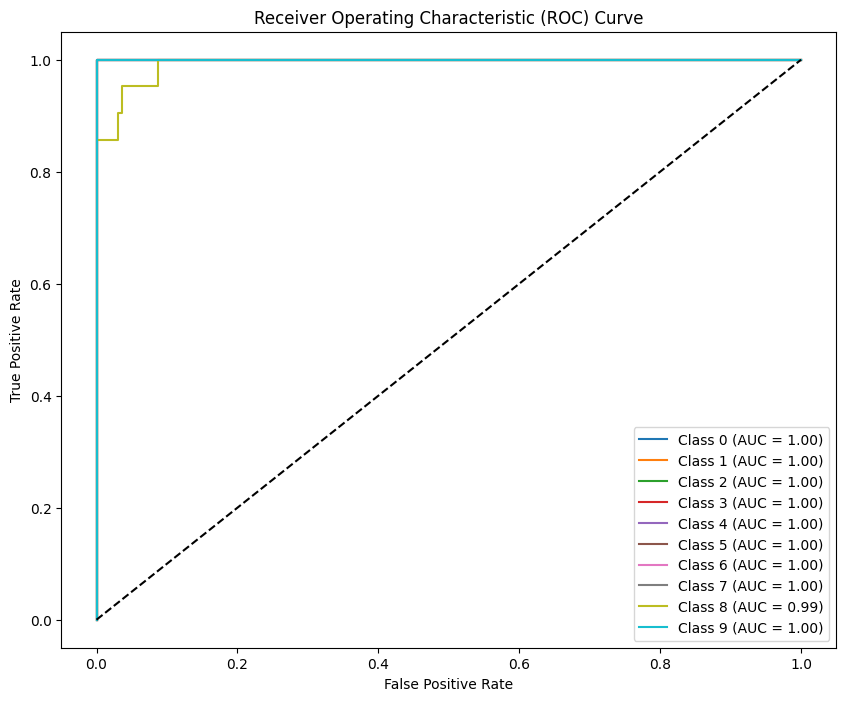

In [13]:
# ROC Curve and AUC for Logistic Regression (Multi-class)
fpr_logistic, tpr_logistic, roc_auc_logistic = {}, {}, {}

# Get the predicted probabilities for each class
log_reg_proba = log_reg.predict_proba(x_test)
# Iterate over each class (multi-class classification)
for i in range(log_reg_proba.shape[1]):  # Number of classes
    fpr_logistic[i], tpr_logistic[i], _ = roc_curve(y_test == i, log_reg_proba[:, i])  # One-vs-rest for each class
    roc_auc_logistic[i] = auc(fpr_logistic[i], tpr_logistic[i])

# Plot ROC Curves for Logistic Regression
plt.figure(figsize=(10, 8))
for i in range(len(roc_auc_logistic)):
    plt.plot(fpr_logistic[i], tpr_logistic[i], label=f'Class {i} (AUC = {roc_auc_logistic[i]:.2f})')


plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.show()

# ROC Curve and AUC for KNN

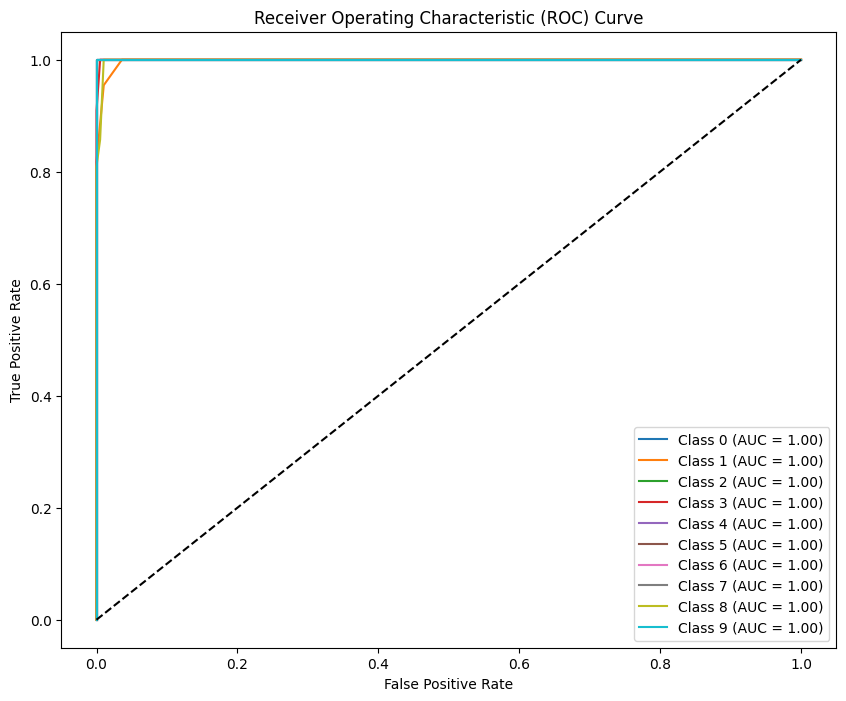

In [14]:
# ROC Curve and AUC for KNN
fpr_knn, tpr_knn, roc_auc_knn = {}, {}, {}

# Get the predicted probabilities for each class
knn_proba = knn.predict_proba(x_test)
# Iterate over each class (multi-class classification)
for i in range(knn_proba.shape[1]):  # Number of classes
    fpr_knn[i], tpr_knn[i], _ = roc_curve(y_test == i, knn_proba[:, i])  # One-vs-rest for each class
    roc_auc_knn[i] = auc(fpr_knn[i], tpr_knn[i])

# Plot ROC Curves for Logistic Regression
plt.figure(figsize=(10, 8))
for i in range(len(roc_auc_knn)):
    plt.plot(fpr_knn[i], tpr_knn[i], label=f'Class {i} (AUC = {roc_auc_knn[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.show()

# Logistic Regression Loss Value


In [15]:
# Logistic Regression Loss Value
from sklearn.metrics import log_loss
log_reg_proba = log_reg.predict_proba(x_test)

# Compute Log Loss
loss_logistic = log_loss(y_test, log_reg_proba)
print(f"Log Loss: {loss_logistic}")

Log Loss: 0.2966039210928518


# KNN Loss Value

In [16]:
# KNN Loss Value
knn_proba = knn.predict_proba(x_test)

# Calculate Log Loss
loss_knn = log_loss(y_test, knn_proba)
print(f"Log Loss for KNN: {loss_knn}")

Log Loss for KNN: 0.07838787363087715
